BS1 cordinates are : [(1000.00000000000, 800.000000000000)]
BS2 cordinates are : (1599.99999999999, 2400.00000000000)
when len of bs3 == 2, base station 3's location is : (2000.00000000000, 1600.00000000000)
when len of bs4 == 2, base station 4's location is : (800.000000000000, 2000.00000000000)


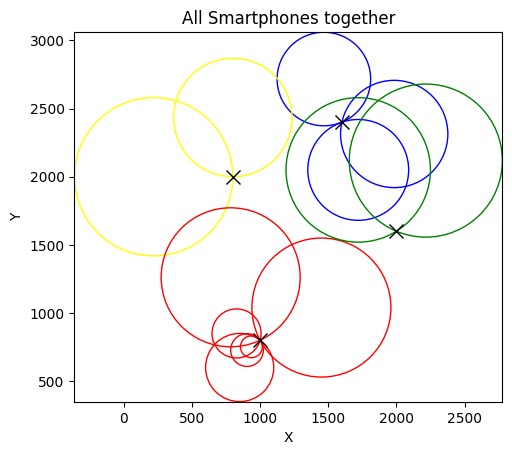

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sympy import symbols,Eq, solve
from IPython.display import display
import math


def find_most_intersected_point(circles):
    if len(circles) < 2:
        return None  # Need at least two circles to find an intersection point

    x1, y1 = symbols('x1 y1',real = True)

    circlesEq =[]
    for circle in circles:
      #display(Eq((x1-circle[0])**2 + (y1-circle[1])**2 , circle[2]**2 ))
      circlesEq.append(Eq((x1-circle[0])**2 + (y1-circle[1])**2 , circle[2]**2 ))
    #print(circlesEq)
    intersections = solve(circlesEq, (x1,y1))
    #print(intersections)
    return intersections


#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------

def findradiusFromRSSI(rssi):
  radius =[]
  for r in rssi:
    rad = (r[1]-r[0])*(600/(r[1]-1))
    radius.append(rad)
  return radius

#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
def is_point_within_circle(BS, phonesInRange):

  cellPhoneCentre =[(1450, 1040), (936, 752),(850, 600),(827.2,850.4),(904,728),(1468,2716.8),(219.2,2000),
           (784,1262),(1720,2050),(1720,2050)
           ,(1984,2313.6),(2216,2118.4),(800,2434.4),(339.2,2614.4),(161.6,2748.8)]
  i=0
  l= len(cellPhoneCentre)
  while i < l:
    if cellPhoneCentre[i]in phonesInRange:
      cellPhoneCentre.remove(cellPhoneCentre[i])
      l=l-1
    else:
      i=i+1

  #print(cellPhoneCentre)

  for c in range(2):
    x2, y2 = BS[c]
    flag = 0
    for p in cellPhoneCentre:
      #print(p)
      x1, y1 = p
      distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
      #print(distance)
      if(distance <= 600):
        flag+=1

    if(flag ==0):
      return BS[c]


#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------

def plot_circles(centers, radii, colors):
    fig, ax = plt.subplots()

    #fig1, ax1 = plt.subplots()
    #fig2, ax2 = plt.subplots()
    #fig3, ax3 = plt.subplots()
    #fig4, ax4 = plt.subplots()


    BS1,BS2,BS3,BS4,BS3PhoneCentres,BS4PhoneCentres = [],[],[],[],[],[]
    circle2 = Circle((827.2,850), 180, fill=False, color='red')
    ax.add_patch(circle2)
    circle1 = Circle((1984,2313.6), 393.6, fill=False, color='blue')
    ax.add_patch(circle1)
    for center, radius, color  in zip(centers, radii, colors):
        circle = Circle(center, radius, fill=False, color=color)

        ax.add_patch(circle)

        if(color== 'red'):
          BS1.append((center[0],center[1],radius))

        elif(color == 'blue'):
          BS2.append((center[0],center[1],radius))

        elif(color == 'green'):
          BS3.append((center[0],center[1],radius))
          BS3PhoneCentres.append((center[0],center[1]))
        elif(color == 'yellow'):
          BS4.append((center[0],center[1],radius))
          BS4PhoneCentres.append((center[0],center[1]))

    bs1 = find_most_intersected_point(BS1)
    print("BS1 cordinates are :", bs1)

    bs2 = find_most_intersected_point(BS2)
    if(len(bs2)>1):
      print("BS2 cordinates are :", bs2[1])

    else:
      print("BS2 cordinates are :", bs2)

    bs3 = find_most_intersected_point(BS3)
    if(len(BS3) == 2):
      exactPoint3 = is_point_within_circle(bs3, BS3PhoneCentres)
      #print("intersecting point or BS3 cordinates are :", bs3)
      #print("bs3 sps are", BS3PhoneCentres)
      print("when len of bs3 == 2, base station 3's location is :", exactPoint3)

    bs4 = find_most_intersected_point(BS4)
    if(len(BS3) == 2):
      exactPoint4 = is_point_within_circle(bs4, BS4PhoneCentres)
      #print("intersecting point or BS4 cordinates are :", bs4)
      #print("bs4 sps are", BS4PhoneCentres)
      print("when len of bs4 == 2, base station 4's location is :", exactPoint4)


    ax.set_aspect('equal')
    ax.set_xlim(min(center[0] - radius for center, radius in zip(centers, radii)) - 1,
                max(center[0] + radius for center, radius in zip(centers, radii)) + 1)
    ax.set_ylim(min(center[1] - radius for center, radius in zip(centers, radii)) - 1,
                max(center[1] + radius for center, radius in zip(centers, radii)) + 1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('All Smartphones together')

    plt.plot(800, 2000, marker="x", markersize=10, markeredgecolor="black", markerfacecolor="black")
    plt.plot(1000, 800, marker="x", markersize=10, markeredgecolor="black", markerfacecolor="black")
    plt.plot(1600,2400, marker="x", markersize=10, markeredgecolor="black", markerfacecolor="black")
    plt.plot(2000,1600, marker="x", markersize=10, markeredgecolor="black", markerfacecolor="black")

    plt.show()

# Example usage
centers = [(1450, 1040), (936, 752),(850, 600)
#,(827.2,850)
,(904,728)
,(1468.0,2716.8)
,(219.2,2000),    (784,1262),(1720,2050),(1720,2050)  ,
 #(1984,2313.6),
  (2216,2118.4),(800,2434.4) ]  # Center coordinates of the circles


#---------------------------------------------------------------------------------------
#radii = [510, 80, 250,  180,120,343.2,580.8 ,  510,370,530    ,393.6,561.6,434.4]  # Radii of the circles
#---------------------------------------------------------------------------------------

rssi = [(10,61),(53,61),(36,61)
#,(176,251)
,(201,251)
,(108,251)
,(9,251),(10,61),(24,61),(8,61),
 #(87,251),
  (17,251),(70,251)]

radii = findradiusFromRSSI(rssi)
#print(radii)
colors = ['red', 'red', 'red',
          'red',
          #'red',
          'blue',
          'yellow'     ,'red','blue','green',
          #'blue',
          'green','yellow']
plot_circles(centers, radii, colors)

#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------